In [1]:
!pip install gensim==3.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 1.9 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
#Install Jcompl
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.2 MB/s 
     |████████████████████████████████| 1.6 MB 29.1 MB/s 
  Created wheel for jcopml: filename=jcopml-1.2.0-py2.py3-none-any.whl size=32032 sha256=80b0f180c7c3cd0a18140a06754c0be4695c50187c29c4f37c8c1751c76cdeaa
  Stored in directory: /root/.cache/pip/wheels/da/9c/84/0670d7771fe7a5383c1ee4506df03e664d1f9abeb54db10e1d
Successfully built jcopml


In [5]:
import os
import numpy as np
import pandas as pd
from gensim.models import FastText
from tqdm.auto import tqdm

from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
sw_indo = stopwords.words("indonesian")
punct = list(punctuation)

In [6]:
# Import dataset yang digunakan, location of dataset in your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_excel('/content/drive/MyDrive/mlp/final_sertifikat_vaksin2.xlsx')

In [8]:
df_sentimen = pd.read_excel('/content/drive/MyDrive/mlp/final_sertifikat_vaksin2.xlsx')

In [9]:
from jcopml.plot import plot_missing_value

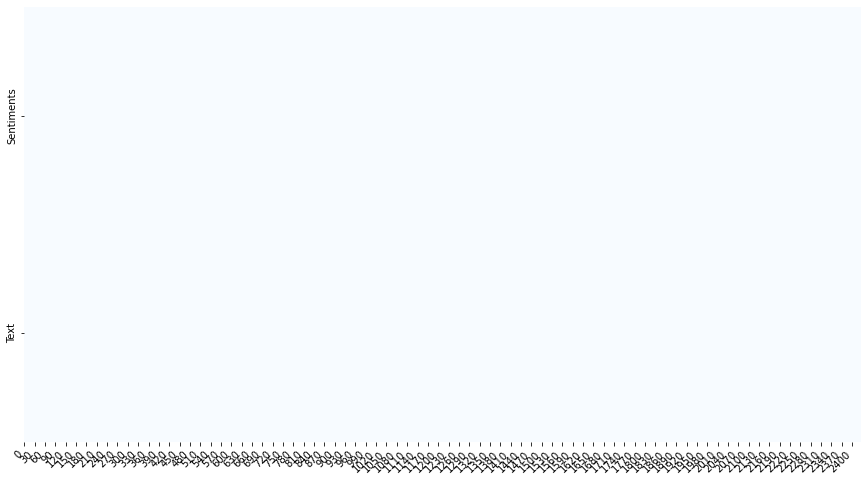

In [10]:
plot_missing_value(df)

In [11]:
df.Sentiments.value_counts()

Positif    2023
Negatif     404
Name: Sentiments, dtype: int64

In [12]:
pos = df[df.Sentiments == 'Positif'][:700]
neg = df[df.Sentiments == 'Negatif']
df = pd.concat([pos,neg])

In [13]:
df

,Sentiments,Text
0,Positif,selamat ulang tahun kelinci. Terima kasih bany...
1,Positif,"RT kabar gembira! Mulai September, vaksin PCV ..."
2,Positif,"RT logikanya, nah.., anak presiden harus disun..."
4,Positif,seni hati para petugas kesehatan... bukti data...
5,Positif,"Dalam hal ini, pelancong berusia 1 tahun ke at..."
...,...,...
2399,Negatif,"Mal vaksinasi tidak berpengaruh, pencapaian va..."
2401,Negatif,Saat saya ke mall kemarin karena tidak punya b...
2414,Negatif,teman-teman ingin bertanya. Mall di jakarta ma...
2417,Negatif,"-RL guys, semua area mall jakarta butuh booste..."


In [14]:
df.Sentiments.value_counts()

Positif    700
Negatif    404
Name: Sentiments, dtype: int64

In [15]:
sentences = [word_tokenize(Text.lower())for Text in tqdm(df_sentimen.Text)]
sentences[:5]

  0%|          | 0/2427 [00:00<?, ?it/s]

[['selamat',
  'ulang',
  'tahun',
  'kelinci',
  '.',
  'terima',
  'kasih',
  'banyak',
  'telah',
  'menjadi',
  'mood',
  'boosterku',
  '.',
  'dimanapun',
  'kalian',
  'berada',
  'semoga',
  'kalian',
  'selalu',
  'sehat',
  ',',
  'bahagia',
  '.',
  'dan',
  'semoga',
  'kita',
  'bisa',
  'bertemu',
  'ya',
  '?',
  'meskipun',
  'saya',
  'tidak',
  'yakin',
  'kapan',
  '.',
  'tapi',
  'aku',
  'selalu',
  'mendukung',
  'apapun',
  'yang',
  'kamu',
  'mau',
  '#',
  'jungkookday'],
 ['rt',
  'kabar',
  'gembira',
  '!',
  'mulai',
  'september',
  ',',
  'vaksin',
  'pcv',
  '(',
  'pneumokokus',
  ')',
  'menjadi',
  'imunisasi',
  'wajib',
  'dan',
  'gratis',
  'yang',
  'akan',
  'diberikan…'],
 ['rt',
  'logikanya',
  ',',
  'nah',
  '..',
  ',',
  'anak',
  'presiden',
  'harus',
  'disuntik',
  'vaksin/booster',
  'dengan',
  'vaksin',
  'terbaik',
  '..',
  'jadi',
  'kenapa',
  '...'],
 ['besok',
  'booster',
  'ke',
  'kantor',
  ',',
  'tapi',
  'saya',
  'c

In [16]:
model = FastText(sentences, size=128, window=5, min_count=3, workers=4, iter=1000, sg=0, hs=0)

In [17]:
os.makedirs("/content/drive/MyDrive/mlp", exist_ok=True)

In [18]:
model.save("/content/drive/MyDrive/mlp/model_final.fasttext")

In [19]:
model = FastText.load('/content/drive/MyDrive/mlp/model_final.fasttext').wv

In [20]:
ft = model.wv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [21]:
ft.vectors

array([[ 1.9518961 ,  4.5937147 , -0.39725113, ..., -5.9137335 ,
         3.750813  ,  0.6873839 ],
       [ 1.9980849 , -0.803139  , -1.0499659 , ..., -1.6968493 ,
         0.75434476,  0.18768713],
       [-3.5131063 ,  8.237116  ,  2.1996286 , ..., -1.1989932 ,
         5.4263363 ,  3.3694856 ],
       ...,
       [ 1.2713192 ,  0.67350316, -1.516542  , ..., -0.09511593,
        -0.18480173,  0.12764645],
       [ 1.7353512 ,  1.4724418 ,  0.16419503, ...,  0.33837292,
         0.12136348, -0.31555837],
       [-1.0925614 ,  3.5741687 , -5.3708644 , ...,  0.62893635,
        -1.2745396 ,  3.7394426 ]], dtype=float32)

In [22]:
ft.vector_size

128

In [23]:
ft.similar_by_word("presiden", topn=10)

[('presisi', 0.6176852583885193),
 ('🙏', 0.31996798515319824),
 ('bm', 0.2781926989555359),
 ('nah', 0.2762756049633026),
 ('sumatera', 0.2749669551849365),
 ('jawab', 0.2746332585811615),
 ("'s", 0.2744000554084778),
 ('km', 0.2641102373600006),
 ('k', 0.2632306218147278),
 ('bakuchiol', 0.2605217695236206)]

In [24]:
 
#  normalize + mean
def norm_vector(sentence, model, stopwords):
    vecs = [model[word.lower()] for word in word_tokenize(sentence) if word not in stopwords]  
    norm_vecs = [vec / np.linalg.norm(vec) for vec in vecs if np.linalg.norm(vec) > 0]
    sent_vecs = np.mean(norm_vecs, axis=0)
    return sent_vecs    

In [25]:
df_HS = pd.read_excel("/content/drive/MyDrive/mlp/MLP_sertifikat_vaksin.xlsx")
df_HS

,Sentiments,Text
0,Positif,selamat ulang tahun kelinci. Terima kasih bany...
1,Positif,"RT kabar gembira! Mulai September, vaksin PCV ..."
2,Positif,"RT logikanya, nah.., anak presiden harus disun..."
3,Positif,seni hati para petugas kesehatan... bukti data...
4,Positif,"Dalam hal ini, pelancong berusia 1 tahun ke at..."
...,...,...
1099,Negatif,"Mal vaksinasi tidak berpengaruh, pencapaian va..."
1100,Negatif,Saat saya ke mall kemarin karena tidak punya b...
1101,Negatif,teman-teman ingin bertanya. Mall di jakarta ma...
1102,Negatif,"-RL guys, semua area mall jakarta butuh booste..."


In [26]:
vecs_train_HS = [norm_vector(sentence, model, sw_indo) for sentence in df_HS.Text]
vecs_train_HS = np.array(vecs_train_HS)
vecs_train_HS

array([[ 0.01608645,  0.03551814,  0.00862379, ..., -0.01584189,
         0.0811507 ,  0.00931501],
       [-0.02680391, -0.00505744,  0.00292977, ..., -0.0076883 ,
         0.03801207, -0.00038959],
       [ 0.03245674,  0.00317627,  0.00129668, ..., -0.05028576,
         0.00474208, -0.00211592],
       ...,
       [ 0.04406836, -0.00954873, -0.01274241, ...,  0.02554374,
         0.0388343 ,  0.07041158],
       [ 0.01295542, -0.00480913, -0.01700989, ..., -0.00292298,
         0.00082861,  0.02573726],
       [ 0.0809034 , -0.05380374,  0.02606003, ..., -0.04485587,
         0.0105328 ,  0.07992832]], dtype=float32)

In [27]:
vecs_train_HS.shape

(1104, 128)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = vecs_train_HS
y = df_HS.Sentiments

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((883, 128), (221, 128), (883,), (221,))

In [30]:
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


X = X_train
y = y_train
parameter = { 
    "hidden_layer_sizes": range(1, 32, 2),
    "learning_rate_init" : [0.001, 0.005, 0.01,0.03]
    }

mlp = GridSearchCV(MLPClassifier(random_state=42), parameter, cv=3, verbose=1, n_jobs=1)
mlp.fit(X_train, y_train)

print(mlp.best_params_)
print(mlp.score(X_train, y_train), mlp.best_score_, mlp.score(X_test, y_test))

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

{'hidden_layer_sizes': 29, 'learning_rate_init': 0.03}
1.0 0.7452054268034898 0.7647058823529411


In [31]:
pd.DataFrame(mlp.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_learning_rate_init,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.994626,0.081928,0.004157,0.000660,1,0.001,"{'hidden_layer_sizes': 1, 'learning_rate_init'...",0.633898,0.636054,0.632653,0.634202,0.001405,61
1,0.516238,0.023447,0.003561,0.001332,1,0.005,"{'hidden_layer_sizes': 1, 'learning_rate_init'...",0.633898,0.636054,0.632653,0.634202,0.001405,61
2,0.304363,0.072014,0.004163,0.001638,1,0.01,"{'hidden_layer_sizes': 1, 'learning_rate_init'...",0.633898,0.636054,0.632653,0.634202,0.001405,61
3,0.203041,0.019609,0.003687,0.000145,1,0.03,"{'hidden_layer_sizes': 1, 'learning_rate_init'...",0.633898,0.636054,0.632653,0.634202,0.001405,61
4,0.741816,0.225192,0.002987,0.000590,3,0.001,"{'hidden_layer_sizes': 3, 'learning_rate_init'...",0.677966,0.724490,0.673469,0.691975,0.023065,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.480726,0.051360,0.001760,0.000019,29,0.03,"{'hidden_layer_sizes': 29, 'learning_rate_init...",0.728814,0.751701,0.755102,0.745205,0.011674,1
60,0.627956,0.009195,0.001983,0.000134,31,0.001,"{'hidden_layer_sizes': 31, 'learning_rate_init...",0.715254,0.751701,0.693878,0.720277,0.023872,33
61,0.673247,0.027469,0.001784,0.000028,31,0.005,"{'hidden_layer_sizes': 31, 'learning_rate_init...",0.708475,0.731293,0.714286,0.718018,0.009682,36
62,0.639957,0.019185,0.003726,0.002694,31,0.01,"{'hidden_layer_sizes': 31, 'learning_rate_init...",0.677966,0.727891,0.721088,0.708982,0.022107,53


In [32]:
print(mlp.best_params_)

{'hidden_layer_sizes': 29, 'learning_rate_init': 0.03}


In [33]:
from jcopml.utils import save_model 

In [34]:
save_model(model, "mlp.pkl")

Model is pickled as model/mlp.pkl


In [35]:
from jcopml.utils import load_model 

In [36]:
predictions = mlp.predict(X_test) 

In [37]:
from jcopml.plot import plot_confusion_matrix

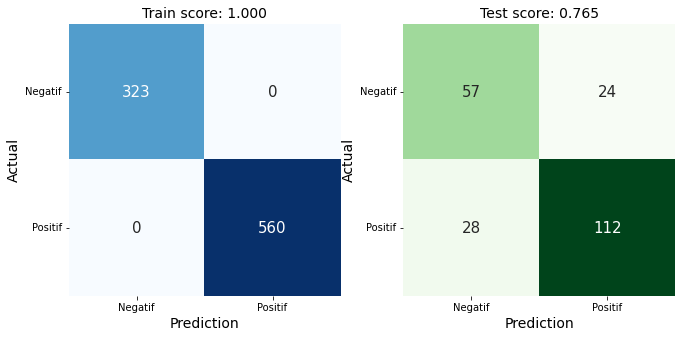

In [38]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, mlp)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
print(classification_report(y_test,predictions))  

              precision    recall  f1-score   support

     Negatif       0.67      0.70      0.69        81
     Positif       0.82      0.80      0.81       140

    accuracy                           0.76       221
   macro avg       0.75      0.75      0.75       221
weighted avg       0.77      0.76      0.77       221



In [41]:
TP=109
TN=59
FP=22
FN=31

In [42]:
ACC= (TP+TN)/(TP+TN+FP+FN)
ACC

0.7601809954751131

POSITIF

In [43]:
precision=TP/(TP+FP)
precision

0.8320610687022901

In [44]:
recall=TP/(TP+FN)
recall

0.7785714285714286

In [45]:
f1score=precision*recall/(precision+recall)
f1score=2*f1score
f1score

0.8044280442804428

NEGATIF

In [46]:
precision=TN/(TN+FN)
precision

0.6555555555555556

In [47]:
recall=TN/(TN+FP)
recall

0.7283950617283951

In [48]:
f1score=precision*recall/(precision+recall)
f1score=2*f1score
f1score

0.6900584795321638